# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [4, 27, 85]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,22615,5410,7198,3915,1777,5185
1,14276,803,3045,485,100,518
2,16117,46197,92780,1026,40827,2944


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

<div class="alert alert-warning">
<h3> Answer 1</h3>
</div>

* The first sample spends almost twice the average on `Fresh` products (22615 vs. 12000), about half the average on `Detergents_Paper` (1777 vs. 2881), and about average on the other porduct categories.  I believe it may be a **whole foods market**.

* The second sample has average spending on `Fresh` prducts, but very low spending on other categories.  Since this place spends so much on produce, it might be a restaurant. 

* The third sample spends much more than the average on `Detergents_Paper`, `Milk`, and `Groceries`.  This combination of categoris leads me to belive this is a supermarket. 

Note: Besides drawing the above conclusions from the table display, it is convenient to have a graphical visualization of the expenditure in each category for each fo the sample dadta ponts.  This was pointed out in my first project review. I have produced the plot below from the code provided in the project review:

<hr>

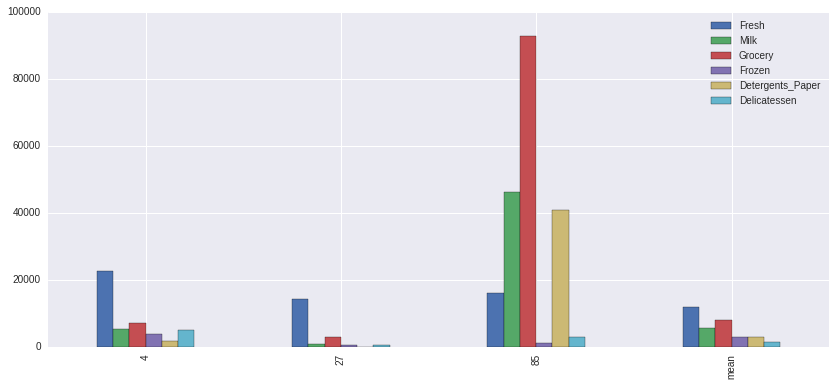

In [4]:
import seaborn as sns
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Dropped feature = 'Fresh'
Fitting the DecisionTreeRegressor to the training set  done in 0.035s

Best estimator found by grid search:
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Training error:  RMSE = 10163.492, R2 = 0.224
Test set error:  RMSE = 16650.580, R2 = -0.165
Dropped feature = 'Milk'
Fitting the DecisionTreeRegressor to the training set  done in 0.035s

Best estimator found by grid search:
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Training error:  RMSE = 2946.226, R2 = 0.858
Test set error:  RMSE = 4362.597, R2 = 0.432
Dropped feature = 'Grocery'
Fitting the DecisionTreeRe

,R2 score,RMSE,dropped
0,-0.164842,16650.580351,Fresh
1,0.431992,4362.596520,Milk
2,0.579242,4414.179689,Grocery
3,0.010271,4854.006942,Frozen
4,0.578558,2038.787913,Detergents_Paper
5,-9.204288,4507.055984,Delicatessen


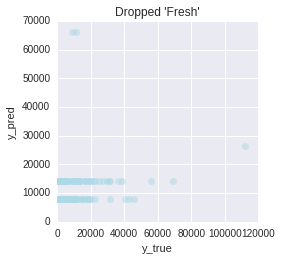

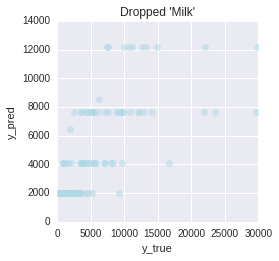

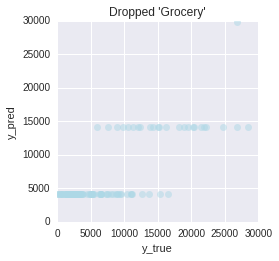

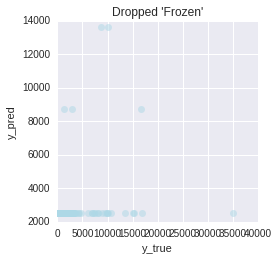

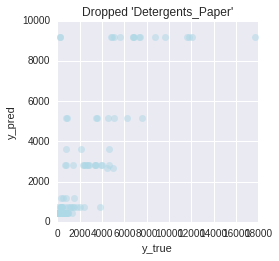

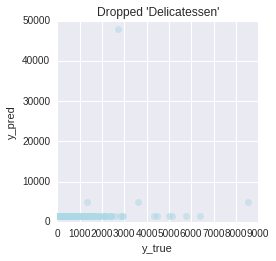

In [5]:
from time import time
import numpy as np
import pylab as pl
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def plot_prediction(y_true, y_pred, title=None):
    """Helper function to plot predicted vs true values"""
    pl.figure(figsize=(3.6, 3.6))
    pl.plot(y_true, y_pred, 'o', mec='blue', mfc='lightblue', alpha=0.5)
    pl.xlabel('y_true')
    pl.ylabel('y_pred')
    if title is not None:
        pl.title(title)

def dropped_feature_regression(dropped_feature):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(dropped_feature, axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target

    X_train, X_test, y_train, y_test = train_test_split(
        new_data, data[dropped_feature], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    param_grid = {
        'max_depth': [2, 4, 8]
    }
    print "Dropped feature = %r" % dropped_feature
    print "Fitting the DecisionTreeRegressor to the training set ",
    t0 = time()
    clf = GridSearchCV(DecisionTreeRegressor(), param_grid)
    clf = clf.fit(X_train, y_train)
    print "done in %0.3fs" % (time() - t0)
    print "\nBest estimator found by grid search:"
    print clf.best_estimator_

    regressor = clf.best_estimator_

    # TODO: Report the score of the prediction using the testing set
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print "\nTraining error:  RMSE = %.3f, R2 = %.3f" % (np.sqrt(mean_squared_error(y_pred_train, y_train)),
                                                       r2_score(y_train, y_pred_train))

    rmse = np.sqrt(mean_squared_error(y_pred_test, y_test))
    
    # The default score for the DecisionTreeRegressor is the R2 score:
    score = regressor.score(X_test, y_test)
    
    # One could also obtain the r2 score from the prediction, known value pairs
    score_r2 = r2_score(y_test, y_pred_test)
    assert abs(score - score_r2) < 1e-6
 
    print "Test set error:  RMSE = %.3f, R2 = %.3f" % (rmse, score)
    
    # PLOT the predictions:
    plot_prediction(y_test, y_pred_test, title='Dropped %r' % dropped_feature)
    
    
    return {'dropped': dropped_feature, 'RMSE': rmse, 'R2 score': score}


results = pd.DataFrame(dropped_feature_regression(feature) for feature in data.keys())
results
    
    

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

<div class="alert alert-warning">
<h3> Answer 2</h3>
</div>

* I attempted prediction of all of the features. 

* The one that was predicted with the best R^2 score was the `Groceries` feature.  

**With an R^2 score value of 0.7091**, I would be willing to say that **the `Groceries` feature is not necessary for identifying customer's spending habits**.  The information it provides is, for the most part, already contained in one or more of the other fetures present in the dataset. 

<hr>

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

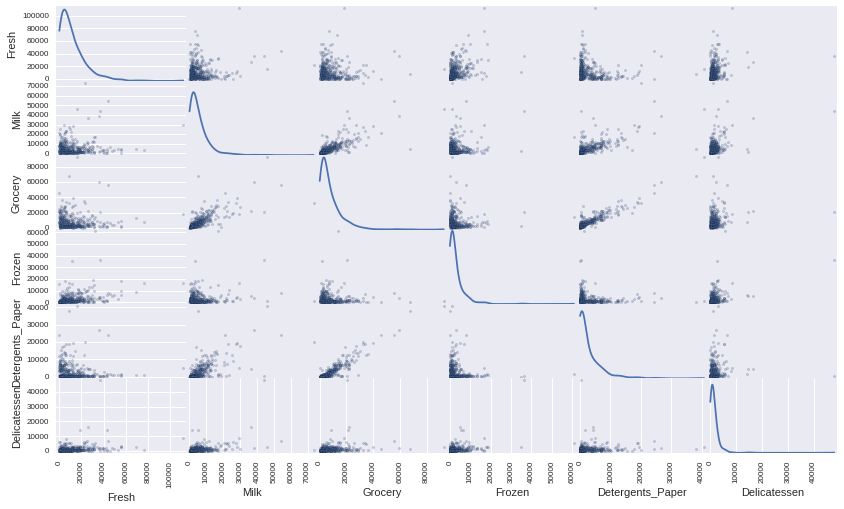

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

<div class="alert alert-warning">
<h3> Answer 3</h3>
</div>

Yes, the `Grocery` feature is correlated with the `Detergents_Paper` feature, which explains the fact that we could predict `Grocery` in the exercise we went through in question 2. 

In addition, `Grocery` also has a non-negligible correlation with `Milk`, which is why we got a better R^2 score when we dropped `Grocery` in Question 2, compared to when we dropped `Detergents_Paper`. 

The distribution of points in the `Grocery` vs. `Detergents_Paper` correlation plot has a tendency to lie along a straight line, and this is what tells us that the two features are correlated.   Each of the features on it's own is heavily skewed towards the lower values. 

<hr>

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

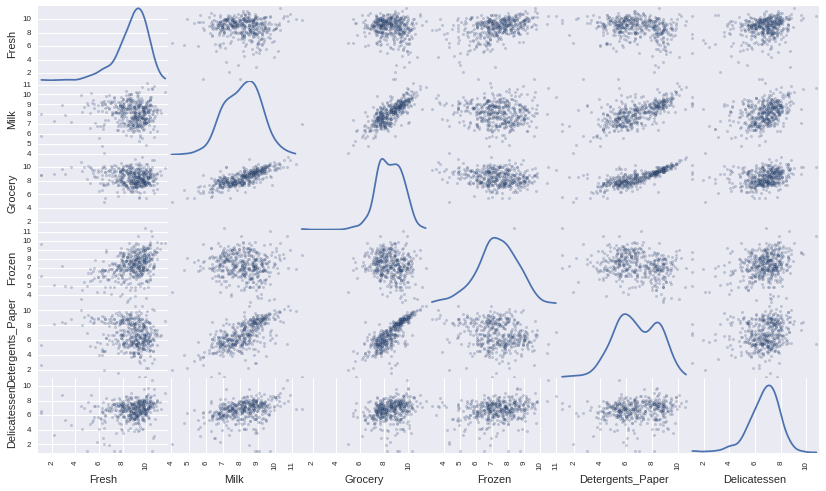

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = data.applymap(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.applymap(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
1,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
2,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [10]:
extreme_outliers = dict()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q1, Q3 = log_data[feature].quantile([0.25, 0.75])
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    center_line = (Q1 + Q3) / 2. 
    
    log_outliers = log_data.assign(outlier_factor=np.abs(log_data[feature] - center_line) / (Q3-Q1))
    
    print "Data points considered outliers for the feature '{}':".format(feature)
    threshold = 0.5 + 1.5 # Distance from center_line to Q1 (or Q3) + step distance
    
    display(log_outliers[log_outliers['outlier_factor'] >= threshold])
    
    # Tag extreme outliers for removal:
    extreme_outliers[feature] = set(log_outliers[log_outliers['outlier_factor'] >= threshold].index.values.tolist())
    
# OPTIONAL: Select the indices for data points you wish to remove

# Let's see if there are any data points that are outliers for more than one feature:

from pprint import pprint
print "\nOutliers by feature:"
pprint(extreme_outliers)


from collections import Counter
counts = Counter()
for feature in data.keys():
    for val in extreme_outliers[feature]:
        counts[val] += 1
        
print "\nFeature counts for each outlier (showing only counts > 1)"
counts = {k: v for k, v in counts.items() if v > 1}
pprint(counts)

display(log_data.iloc[counts.keys()])

# OUTLIERS:
outliers = counts.keys()
print outliers


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outlier_factor
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,2.634634
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,3.964071
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856,2.074292
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856,4.614520
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897,3.408555
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,2.339199
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337,2.128024
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290,2.190404
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669,3.553683
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382,2.256451


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outlier_factor
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723,2.004067
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802,2.192969
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,2.653122
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275,2.076929


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outlier_factor
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,4.611962
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,2.222468


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outlier_factor
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738,2.487699
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177,2.397623
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,2.432144
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155,2.333721
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617,2.197359
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827,2.095438
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128,2.313657
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215,2.664961
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446,2.261906
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244,2.054886


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outlier_factor
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,2.132098
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101,2.132098


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,outlier_factor
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,2.316925
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612,3.786785
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,3.786785
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519,2.124477
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612,3.786785
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,3.130647
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768,2.688200
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895,2.917614
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612,3.786785
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372,2.588166



Outliers by feature:
{'Delicatessen': set([66,
                      109,
                      128,
                      137,
                      142,
                      154,
                      183,
                      184,
                      187,
                      203,
                      233,
                      285,
                      289,
                      343]),
 'Detergents_Paper': set([75, 161]),
 'Fresh': set([65,
               66,
               81,
               95,
               96,
               128,
               171,
               193,
               218,
               304,
               305,
               338,
               353,
               355,
               357,
               412]),
 'Frozen': set([38, 57, 65, 145, 175, 264, 325, 420, 429, 439]),
 'Grocery': set([75, 154]),
 'Milk': set([86, 98, 154, 356])}

Feature counts for each outlier (showing only counts > 1)
{65: 2, 66: 2, 75: 2, 128: 2, 154: 3}


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837


[128, 65, 154, 75, 66]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

<div class="alert alert-warning">
<h3> Answer 4</h3>
</div>

Yes, in the analysis performed in the code cell for Question 3 we found out that the following points are outliers for more than one feature:

    Point 154:  3 features
    Point  65:  2 features
    Point  66:  2 features
    Point  75:  2 features
    Point 128:  2 features
    
In the end, my decision was to go ahead and remove the points that are outliers for more than one feature.  I believe that those points might through off the clustering scheme in unexpected ways.  Including those extreme outliers may result in clustering that is highly biased by the training data (overfitting), and will possibly not generalize as well to unseen data points.

<hr>

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

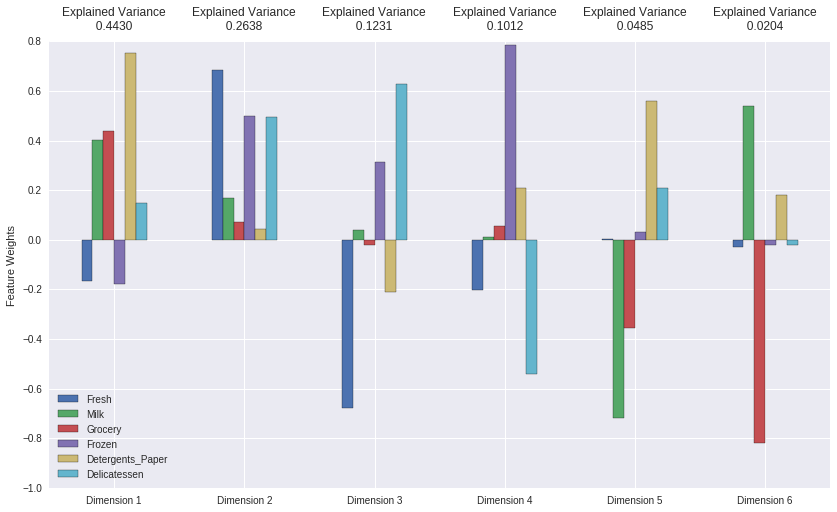

In [11]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys()))
pca.fit(good_data)
          
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

<div class="alert alert-warning">
<h3> Answer 5</h3>
</div>

* The total variance explained by the first two principal components is 0.7068. 

* The total variance explained by the first four components is 0.9311.

As required by the question and specification, please interpret each of the first to fourth dimensions of the dataset as a representation of customer spending with justification. However, you did not suggest what might the dimensions representing.

Please suggest the customer spending of first four dimensions might be representing.
For example, for a particular dimension, you could say:
a significant positive weight is placed on Detergents_Paper with meaningful positive weight on Milk and Grocery. This dimension is best categorized by customer spending on retail goods.

#### Interpretation for the first four components:

We describe the components in terms of an ficticious establishment that would have a large positive value for the described component, and nearly zero value for all other components.

#####  1st component

An establishment that spends significantly more than average on `Milk`, `Grocery`, and `Detergents_Paper`,  while spending slightly less than average on `Fresh` and `Frozen`.  The large positive weight on `Detergents_Paper` leads me to belive that this custumer **could be a retailer, like a big supermarket** for example.

##### 2nd component

An establishment that spends significantly more than average on `Fresh`, `Frozen`, and `Delicatessen`.  This kind of establishment **could be a specific kind of restaurant, like a diner** for example.

##### 3rd component

An establishment that spends much less than average on `Fresh`, and more than average on `Frozen` and `Delicatessen`.  The spending pattern of this 3rd component is only different from the 2nd component in the vastly different weight for the `Fresh` category.  This suggests to me that this third component **could also represent a kind of restaurant, but one that may sell different type of food,  like a sandwich shop** for instance. 

##### 4th component

An establishment that spends way more than average on `Frozen`, and significantly less than average on `Delicatessen`, with some expenditure in `Detergents_Paper`.  This pattern suggests that this component **could represent a hotel**.

<hr>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.7848,2.3943,0.4798,-0.3483,0.3191,-0.0613
1,-2.4162,-0.6069,-0.7652,-1.3209,-0.1614,-0.8089
2,5.3316,1.8845,-0.6957,-0.1972,-0.5461,-0.3802


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.7848,2.3943
1,-2.4162,-0.6069
2,5.3316,1.8845


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

<div class="alert alert-warning">
<h3> Answer 6</h3>
</div>

The K-Means algorithm is a special case of the Gaussian Mixture Model where, rather than assigning a probability that a point belongs to a cluster, we make a hard cluster assignment.  

While experimenting with GMM and the data in this project, I found that when using a 'non-spherical' covariance type parameter, I could sometimes get clusters that were not convex sets.  For this particular application, where we are trying to come up with a segmentation to provide different treatment to different kinds of establishments it is perhaps better not to deal with trying to interpret the kind of clustering that one may obtain when using GMM.

For that reason we will stick to the K-means algorithm, which by virtue of being simpler offers us less variance, and also better training performance.  In the end we hope that we can associate the resulting clusters with corresponding types of establishments that make sense from a business perspective.

<hr>

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different number of cluster  centeres
classifiers = dict((n_clusters, KMeans(n_clusters=n_clusters, random_state=10, n_init=20))
                   for n_clusters in [2, 3, 4, 5, 6, 7, 8, 10, 12, 14])


# TODO: Apply your clustering algorithm of choice to the reduced data

for n_clusters, clusterer in classifiers.items():
    clusterer.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "n_clusters = %d,  score = %0.3f" % (n_clusters, score)
    
# Use n_clusters = 2:
n_clusters = 2
clusterer = classifiers[n_clusters]
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)
print "\nn_classes = %d,  score = %0.3f" % (n_clusters, score)

n_clusters = 2,  score = 0.426
n_clusters = 3,  score = 0.397
n_clusters = 4,  score = 0.333
n_clusters = 5,  score = 0.352
n_clusters = 6,  score = 0.365
n_clusters = 7,  score = 0.365
n_clusters = 8,  score = 0.364
n_clusters = 10,  score = 0.351
n_clusters = 12,  score = 0.357
n_clusters = 14,  score = 0.352

n_classes = 2,  score = 0.426


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

<div class="alert alert-warning">
<h3> Answer 7</h3>
</div>

The scores for several cluster numbers are shown in the output of the cell above.  Of these, the best silhouette score was obtained for `n_classes=2`, and that is the number of clusters that I will choose for my clustering algorithm.

<hr>

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

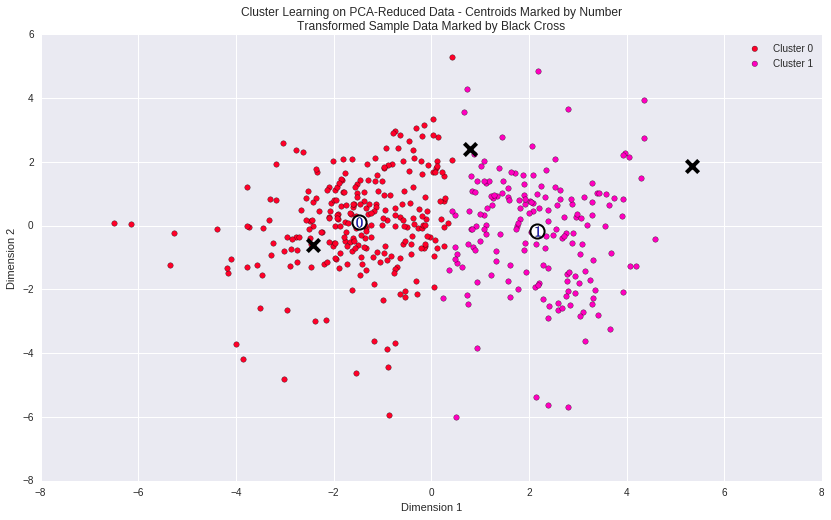

In [16]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [18]:
print 4005. / 12000
print 7900. / 5796
print 12104. / 7951
print 952. / 3071
print 4561. / 2881
print 1036. / 1524

0.33375
1.3630089717
1.52232423595
0.309996743732
1.58313085734
0.679790026247


<div class="alert alert-warning">
<h3> Answer 8</h3>
</div>

Average purchase cost per category:

```
Fresh             12000.3
Milk               5796.3
Grocery            7951.3
Frozen             3071.9
Detergents_Paper   2881.5
Delicatessen       1524.9
```

* **Segment 0**
    Buys around 74% the average expenditure of `Fresh`
    Buys around 33% the average expenditure of `Milk`
    Buys around 31% the average expenditure of `Grocery`
    Buys around 68% the average expenditure of `Frozen`
    Buys around 10% the average expenditure of `Detergents_Paper`
    Buys around 44% the average expenditure of `Delicatessen`
    
    All categories are less than the average expenditure, and the top two categories are `Fresh` and `Frozen`.  This patter suggests that this is a establishment like a **restaurant or a cafe**.


* **Segment 1**
    Buys around 33% the average expenditure of `Fresh`
    Buys around 136% the average expenditure of `Milk`
    Buys around 152% the average expenditure of `Grocery`
    Buys around 31% the average expenditure of `Frozen`
    Buys around 158% the average expenditure of `Detergents_Paper`
    Buys around 68% the average expenditure of `Delicatessen`
    
    Categories that are above average are `Milk`, `Grocery`, and `Detergents_Paper`.  Below average on `Fresh` and `Frozen`.  This spending pattern suggests that this segment represents **retailers**.
   
<hr>

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [19]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


<div class="alert alert-warning">
<h3> Answer 9</h3>
</div>

According to my cluster labeling from *Question 8*:

* Point 0 is a whole foods market
* Point 1 is a local produce store
* Point 2 is a supermarket

At the beggining of this project I guessed the kind of establishment for each of the sample points.  These were my guesses:

* Point 0 was guessed to be a retailer
* Point 1 was guessed to be a restaurant or cafe
* Point 2 was guessed to be a retailer

<hr>


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

<div class="alert alert-warning">
<h3> Answer 10</h3>
</div>

It would be wrong to assume that a change in the delivery frequency will affect all customers equally. It seems that for products that are non-persishable, establishements can adapt easily to a new delivery frequency, whereas for products that are persihable and need to be fresh (such as `Milk` or `Fresh`), a change in the delivery frequency could be catastrophic for the establishment. 

We can study our customer segments and find out which of them have a large fraction of the total cost coming from the `Fresh` or `Milk` categories.  Those that do have those categories as the bulk of their expenditure will be most affect by a change in the delivery frequency:

In [20]:
relies_on_frequent_deliveries = ((true_centers.Milk + true_centers.Fresh) /
                                 true_centers.sum(axis=1))

display(relies_on_frequent_deliveries)

Segment 0    0.660206
Segment 1    0.389587
dtype: float64

Looking at the cost fraction for `Milk` and `Fresh` for each segment, as shown above, we can say that **Segment 0 would be most affected by a change in the delivery frequency.**

According to my establishment category guesses, those segments correspond to **restaurant or cafe**.

<hr>

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

<div class="alert alert-warning">
<h3> Answer 11</h3>
</div>

Indeed, as the question indicates we could train a classifier where the features are the annual spendings in each category and the target variable would be the segment as was obtained from clustering.  A good candidate for this classisfier would be a DecisionTreeClassifier.  

With the projected annual spendings for the new customers, the wholesale distributor could use the trained DecisionTreeClassifier to predict a customer segment for the new customer.  

<hr>

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

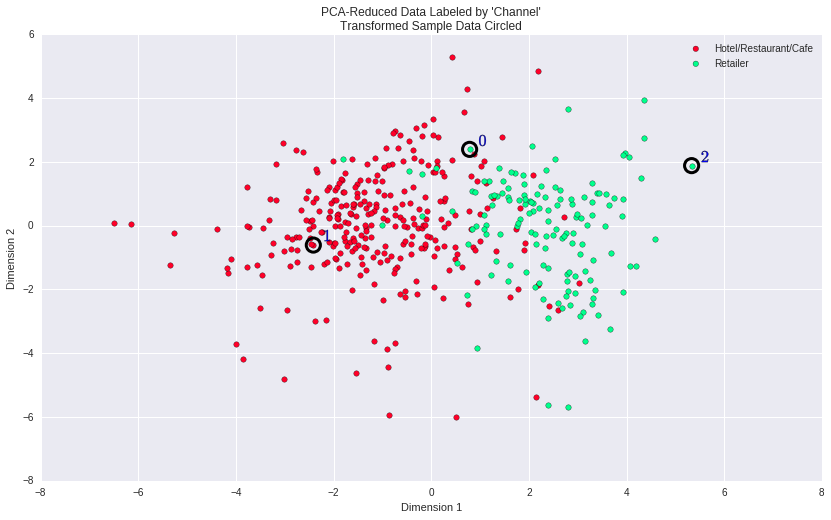

In [21]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

<div class="alert alert-warning">
<h3> Answer 12</h3>
</div>

The number of channels is only 2:  `Hotel/Restaurant/Cafe` and `Retailer`.  This is in line with the number of cluster centers that was found via the silhouette score. 
    
At this point it is good to recall that my guess for the type of establishment in each segment was as follows:


* **Segment 0**
    Restaurant or cafe
    
* **Segment 1**
    Retailer
    
The channels classification is thus consitent with my definition of the customer segements.

<hr>

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.